In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import stats Lbrary
from scipy.stats import chi2_contingency, f_oneway
!pip install colorama
from colorama import Fore
import scipy.stats as stats
import statsmodels.api as sma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data given by Telco
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

**DATA PROCESSING**

In [ ]:
# let's get a look on the data given by Telco
display(df)
display(df.info())
df.nunique()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df["TotalCharges"].value_counts(ascending=False)

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
159.4       1
2301.15     1
1558.65     1
2076.2      1
160.8       1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df[df["TotalCharges"]== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# we replace where costumer had " " as value by 0
df["TotalCharges"].replace(r'^\s*$', 0, regex=True, inplace= True)

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

**DATA ANALYSIS**

In [ ]:
print(df.dtypes)
print(df.describe())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.

 # analysis customer churn

-7043 customers

-maximum monthly charge 118$

-average total charge : 2290$

In [ ]:
df.columns.duplicated().sum()

0

In [ ]:
yes_churn= df.Churn[df.Churn == 'Yes'].count()
no_churn= df.Churn[df.Churn == 'No'].count()
print("Total number of customer churn: ",yes_churn , "customers")
print("Total number of customer not churn: ",no_churn , "customers")
churn_yesInPercent = round((yes_churn/df.shape[0])*100,2)
churn_noInPercent = round((no_churn/df.shape[0])*100,2)
print("Percentage of customer churn: ",'{:,}'.format(churn_yesInPercent), "%") 
print("Percentage of customer not churn: ",'{:,}'.format(churn_noInPercent), "%") 

Total number of customer churn:  1869 customers
Total number of customer not churn:  5174 customers
Percentage of customer churn:  26.54 %
Percentage of customer not churn:  73.46 %


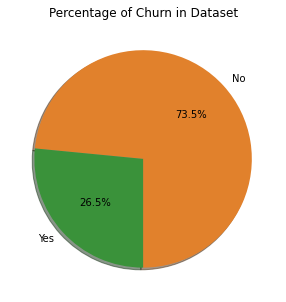

In [ ]:
# Data to plot
df0 = df['Churn'].value_counts(sort = True)
colors = ["#e1812c","#3a923a"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(df0, labels = ['No','Yes'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

## 1) impact of the churn

In [ ]:
financialValuesCustomerChurns=df[df["Churn"]== "Yes"]["TotalCharges"].sum()
financialValuesCustomerChurn=df['TotalCharges'].groupby(by=df["Churn"]).sum()
display(financialValuesCustomerChurn)
print("The value of financial customer churn: $",'{:,}'.format(financialValuesCustomerChurns))
financialPercentValuesCustomerChurns =round((financialValuesCustomerChurns/df["TotalCharges"].sum())*100,2)
print("Financial values in percentage of customers churm: ",'{:,}'.format(financialPercentValuesCustomerChurns), "%")

Churn
No     13193241.8
Yes     2862926.9
Name: TotalCharges, dtype: float64

The value of financial customer churn: $ 2,862,926.9
Financial values in percentage of customers churm:  17.83 %


In [ ]:
impact = df[['Churn', 'MonthlyCharges']].groupby(['Churn']).sum()
impact
impact['Churn_impact'] = round((impact/impact.sum())*100,2)
impact[:2]

,MonthlyCharges,Churn_impact
Churn,,
No,316985.75,69.5
Yes,139130.85,30.5


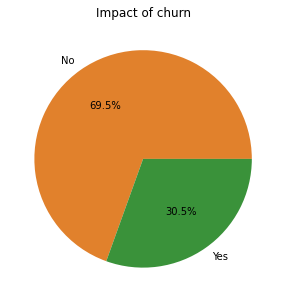

In [ ]:

Churn = 'No', 'Yes'
df= [69.5,30.5]
colors = ['#e1812c','#3a923a']
plt.pie(df, labels=Churn, colors=colors, autopct='%1.1f%%')    
plt.title('Impact of churn')
plt.show()

In [ ]:
# daily loss of customer
dailyChargeLossCustomer=round(yes_churn/30,0)
dailyChargeLossCustomer
print("daily charges loss : ",'{:,}'.format(dailyChargeLossCustomer), "customers") 

daily charges loss :  62.0 customers


26,54% of customers churn

monthly value of charge customer churn: $ 139,130.85 

The toTAL value of Charge customer churn: $ 2,862,926.9 wich represent 17.83%

In [ ]:
#numerical and categorical values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
#categorical list
listCategoricalByCustomerID =['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

categorical = df[listCategoricalByCustomerID].astype('category')
categorical


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic)
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic)
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check


In [ ]:
listcategorical =['gender','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

listcategorical1 = df[listcategorical].astype('category')
listcategoricalDummies = pd.get_dummies(listcategorical1)
listcategoricalDummies

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
7040,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
numericalValue = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
numericalValue.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
df['Churn Binary'] = np.where(df['Churn'] == 'Yes', 1, 0)
z=df['Churn Binary']

In [ ]:
listcategorical2 =['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

listcategorical2 = df[listcategorical2].astype('category')
listcategoricalDummies = pd.get_dummies(listcategorical2)

In [ ]:

x = pd.concat([listcategoricalDummies,numericalValue], axis=1)

In [ ]:

df_dummies=pd.concat([x,z],axis=1)


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [ ]:
churnByGender= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['gender'], aggfunc='count')
churnByGender

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [ ]:
stat, p, dof, expected = chi2_contingency(churnByGender)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.48657873605618596
Hypothesis Accepted


In [ ]:
churnByCitizen= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['SeniorCitizen'], aggfunc='count')
display(churnByCitizen)
stat, p, dof, expected = chi2_contingency(churnByCitizen)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


p-values: 1.510066805092378e-36
Hypothesis Rejected


In [ ]:
churnByDependents= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['Dependents'], aggfunc='count')
display(churnByCitizen)
stat, p, dof, expected = chi2_contingency(churnByDependents)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


p-values: 4.9249216612154196e-43
Hypothesis Rejected


In [ ]:
churnByContract= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['Contract'], aggfunc='count')
display(churnByContract)
stat, p, dof, expected = chi2_contingency(churnByContract)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


p-values: 5.863038300673391e-258
Hypothesis Rejected


In [ ]:
churnByPaymentMethod= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['PaymentMethod'], aggfunc='count')
display(churnByPaymentMethod)
stat, p, dof, expected = chi2_contingency(churnByPaymentMethod)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


p-values: 3.6823546520097993e-140
Hypothesis Rejected


In [ ]:
def generate_barchar(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

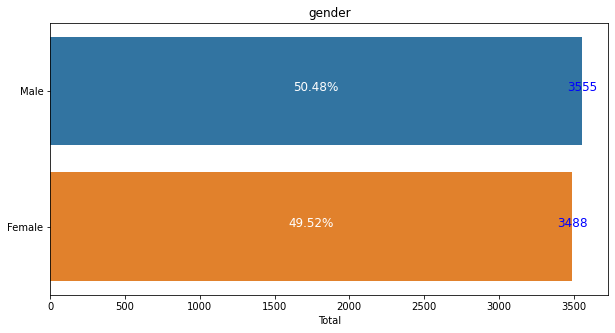

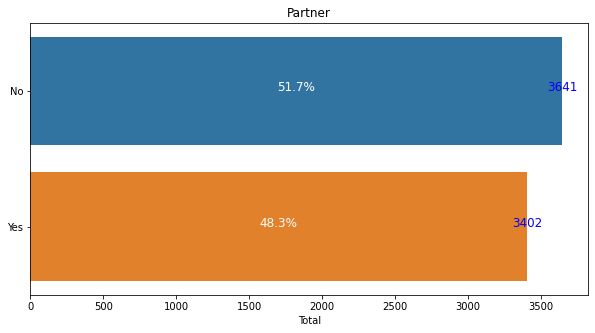

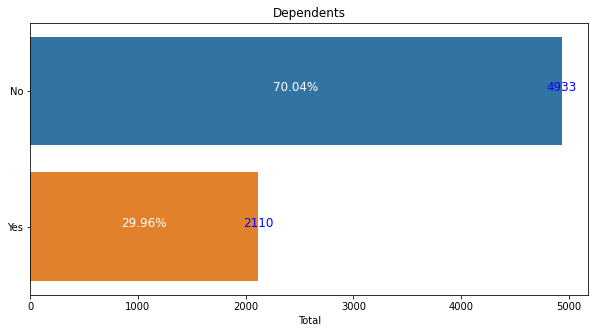

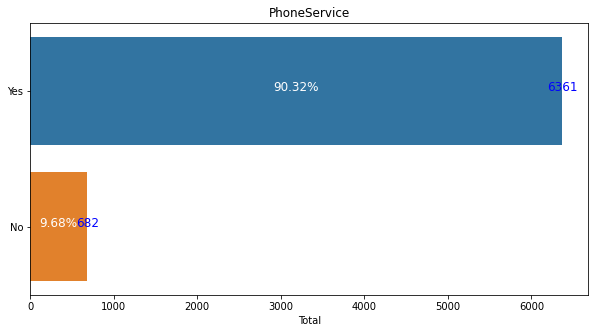

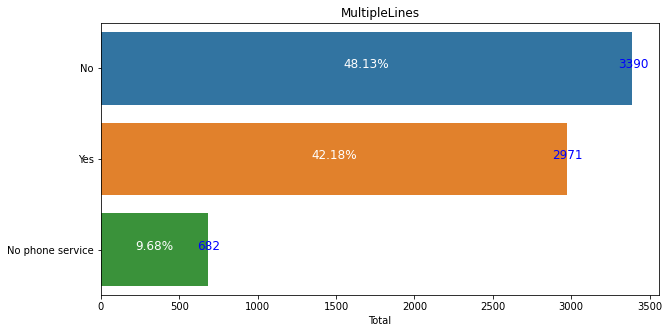

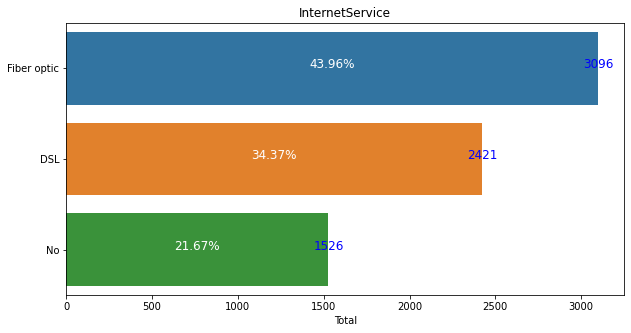

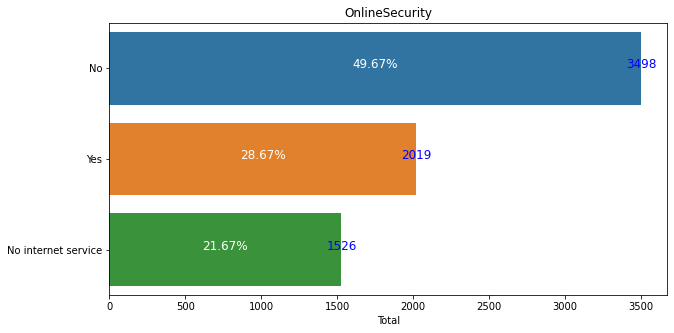

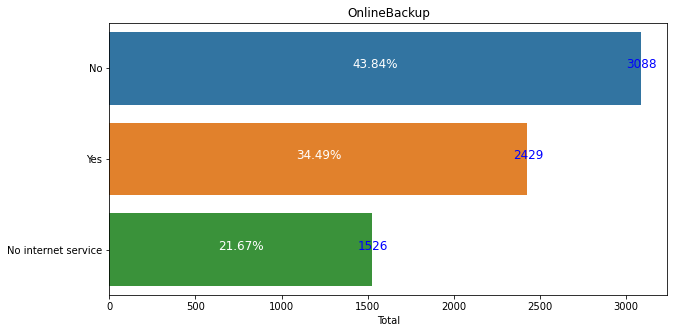

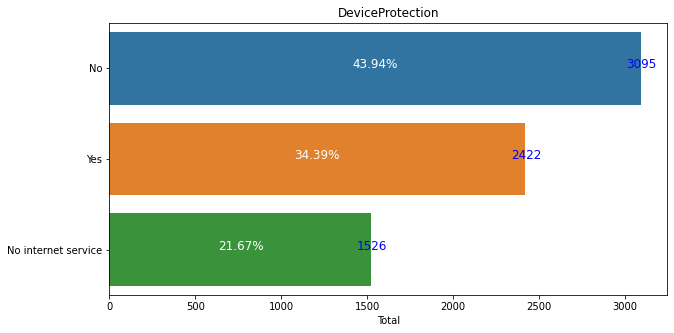

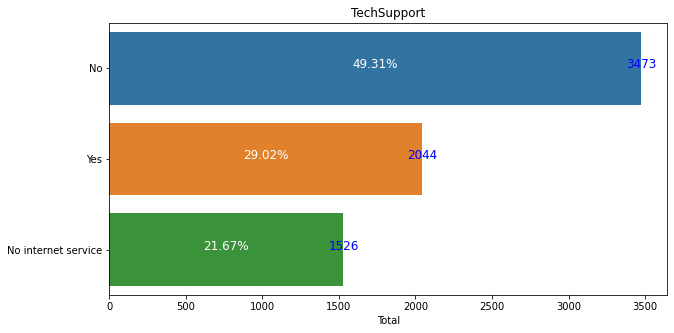

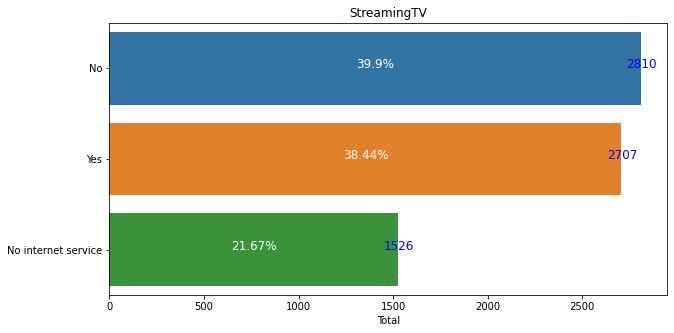

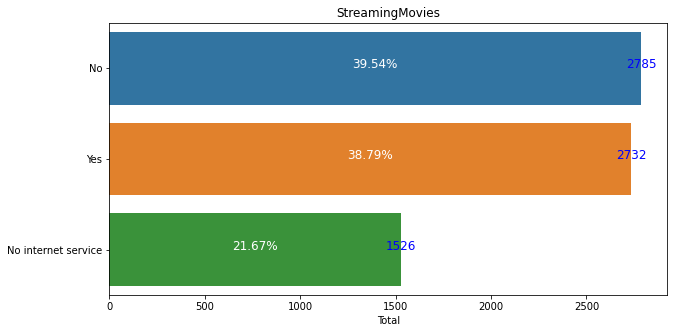

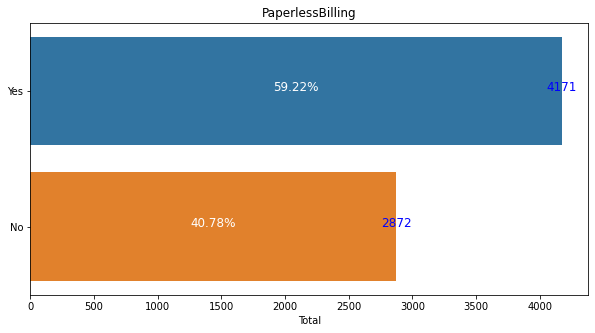

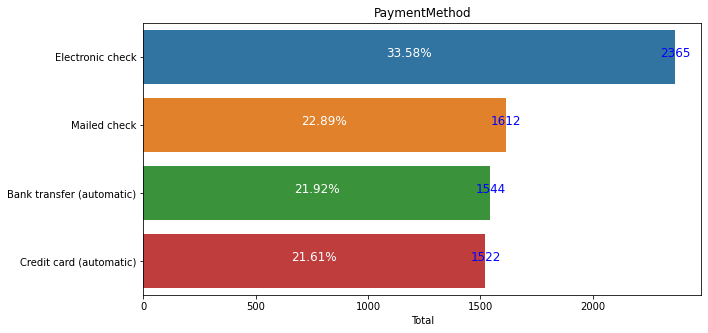

In [ ]:
for col in listcategorical1:
    prob_category(data=df ,top_n=5, col=col,abs_value ="Total",rel_value ="Percent",show_plot=True, title=col,figsize=(10,5))


In [ ]:
def plot(data):
  plt.figure(figsize=(6,6))
  bar =sns.barplot(data=data,x=data.index,y="Total")
  i = 0
  for tot,perc in zip(data['Total'],data['%']):
    bar.text(i,
            tot/2,
            str(np.round(perc*100,2))+ "%",
            fontdict=dict(color='White',fontsize=12,horizontalalignment="center"))
    bar.text(i,
            tot+10,
            str(tot),
            fontdict=dict(color='blue',fontsize=12,horizontalalignment="center"))
    
    i+=1
  plt.title("Churned Distribution")
  plt.legend()

  

In [ ]:
def table(data,column,index,value,aggf):
    count = data[data[column]=='Yes'].pivot_table(index=index,columns=column,values=value, aggfunc=aggf)
    prct  = round(count/data[data[column]=='Yes'].shape[0],3)
    data  = pd.concat([count,prct],axis=1)
    data.columns = ['Total','%']
    plot(data)
    return data 

No handles with labels found to put in legend.


,Total,%
gender,,
Female,939,0.502
Male,930,0.498


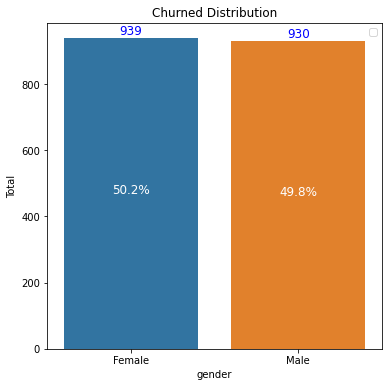

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn Binary'],
      dtype='object')

**now let's compare where churm is yes by categorical**

No handles with labels found to put in legend.


,Total,%
gender,,
Female,939,0.502
Male,930,0.498


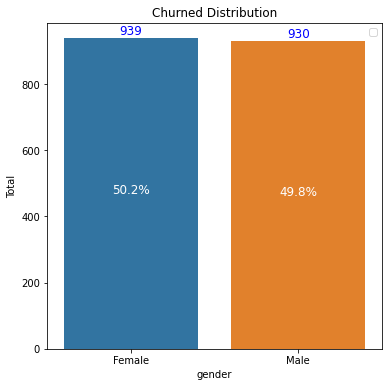

In [ ]:
table(data=df,column='Churn',index='gender',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
SeniorCitizen,,
0,1393,0.745
1,476,0.255


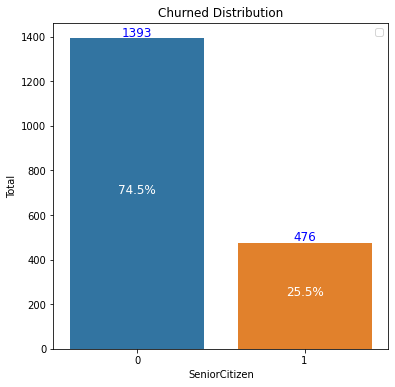

In [ ]:
table(data=df,column='Churn',index='SeniorCitizen',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
PhoneService,,
No,170,0.091
Yes,1699,0.909


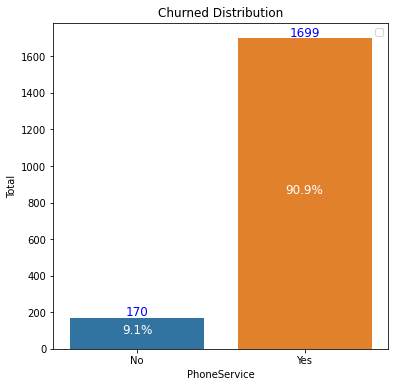

In [ ]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
PhoneService,,
No,170,0.091
Yes,1699,0.909


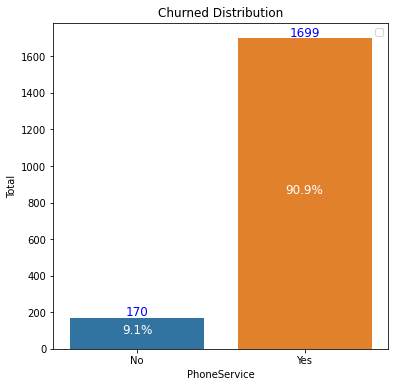

In [ ]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
Dependents,,
No,1543,0.826
Yes,326,0.174


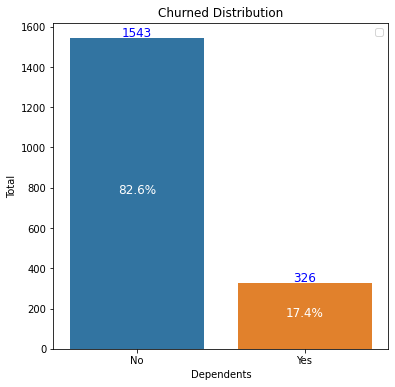

In [ ]:
table(data=df,column='Churn',index='Dependents',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
MultipleLines,,
No,849,0.454
No phone service,170,0.091
Yes,850,0.455


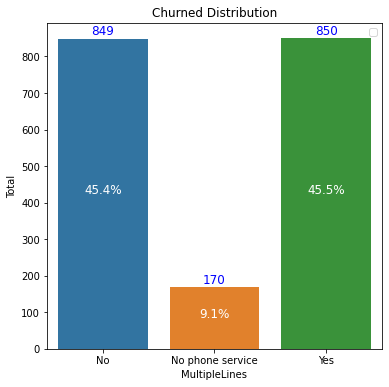

In [ ]:
table(data=df,column='Churn',index='MultipleLines',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
InternetService,,
DSL,459,0.246
Fiber optic,1297,0.694
No,113,0.060


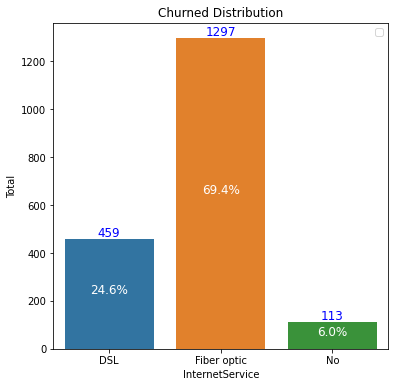

In [ ]:
table(data=df,column='Churn',index='InternetService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
OnlineBackup,,
No,1233,0.66
No internet service,113,0.06
Yes,523,0.28


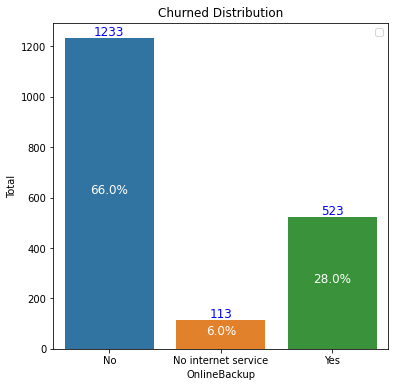

In [ ]:
table(data=df,column='Churn',index='OnlineBackup',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
DeviceProtection,,
No,1211,0.648
No internet service,113,0.060
Yes,545,0.292


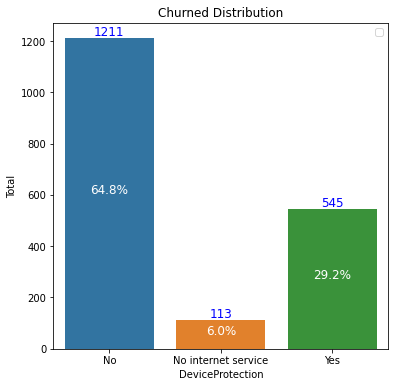

In [ ]:
table(data=df,column='Churn',index='DeviceProtection',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
TechSupport,,
No,1446,0.774
No internet service,113,0.060
Yes,310,0.166


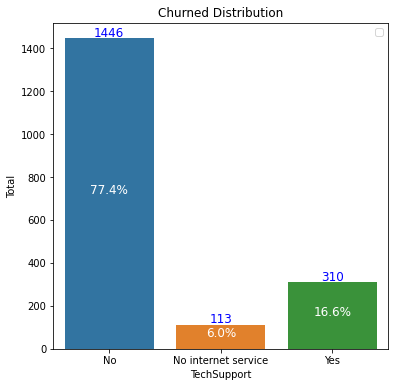

In [ ]:
table(data=df,column='Churn',index='TechSupport',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
StreamingTV,,
No,942,0.504
No internet service,113,0.060
Yes,814,0.436


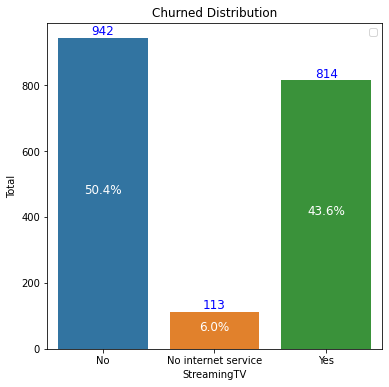

In [ ]:
table(data=df,column='Churn',index='StreamingTV',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
StreamingMovies,,
No,938,0.502
No internet service,113,0.060
Yes,818,0.438


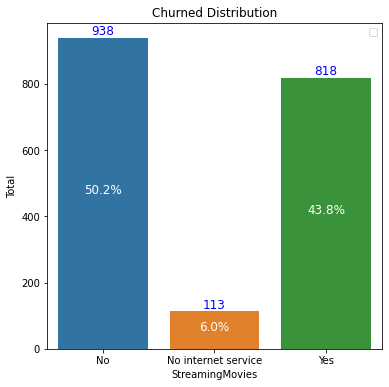

In [ ]:
table(data=df,column='Churn',index='StreamingMovies',value='customerID', aggf='count')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,Total,%
PaperlessBilling,,
No,469,0.251
Yes,1400,0.749


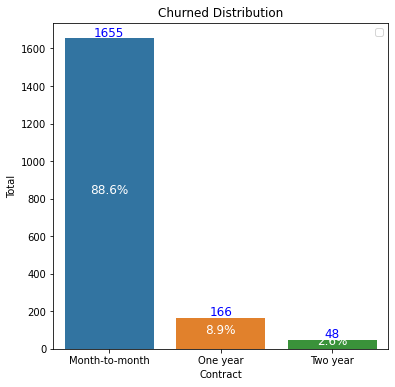

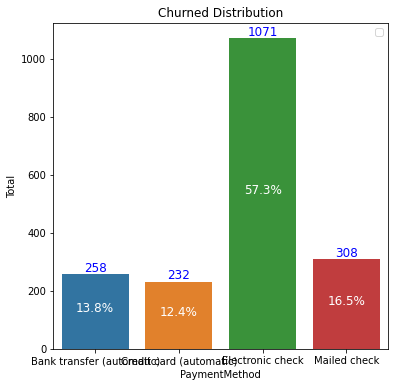

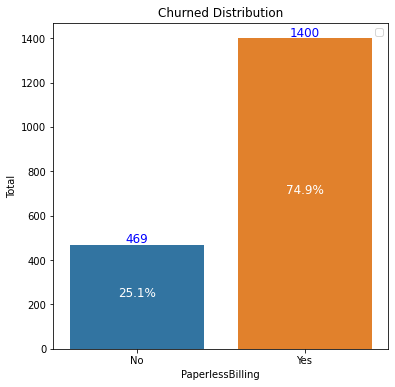

In [ ]:
table(data=df,column='Churn',index='Contract',value='customerID', aggf='count')


No handles with labels found to put in legend.


,Total,%
PaymentMethod,,
Bank transfer (automatic),258,0.138
Credit card (automatic),232,0.124
Electronic check,1071,0.573
Mailed check,308,0.165


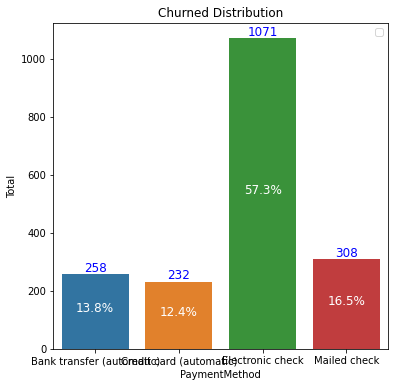

In [ ]:
table(data=df,column='Churn',index='PaymentMethod',value='customerID', aggf='count')


No handles with labels found to put in legend.


,Total,%
PaperlessBilling,,
No,469,0.251
Yes,1400,0.749


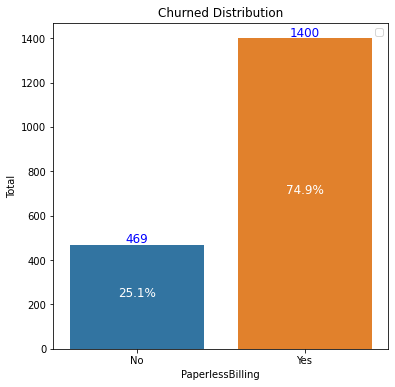

In [ ]:
table(data=df,column='Churn',index='PaperlessBilling',value='customerID', aggf='count')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


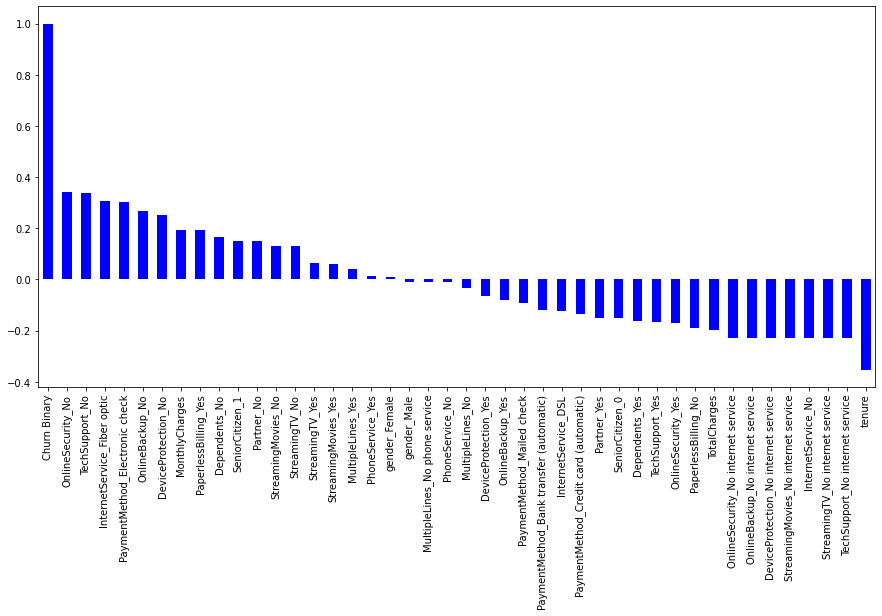

In [ ]:
plt.figure(figsize=(15,7))
df_dummies.corr()['Churn Binary'].sort_values(ascending=False).plot(kind='bar',color = "blue", cmap="autumn")

Text(0.5, 1.0, 'Correlation HeatMap')

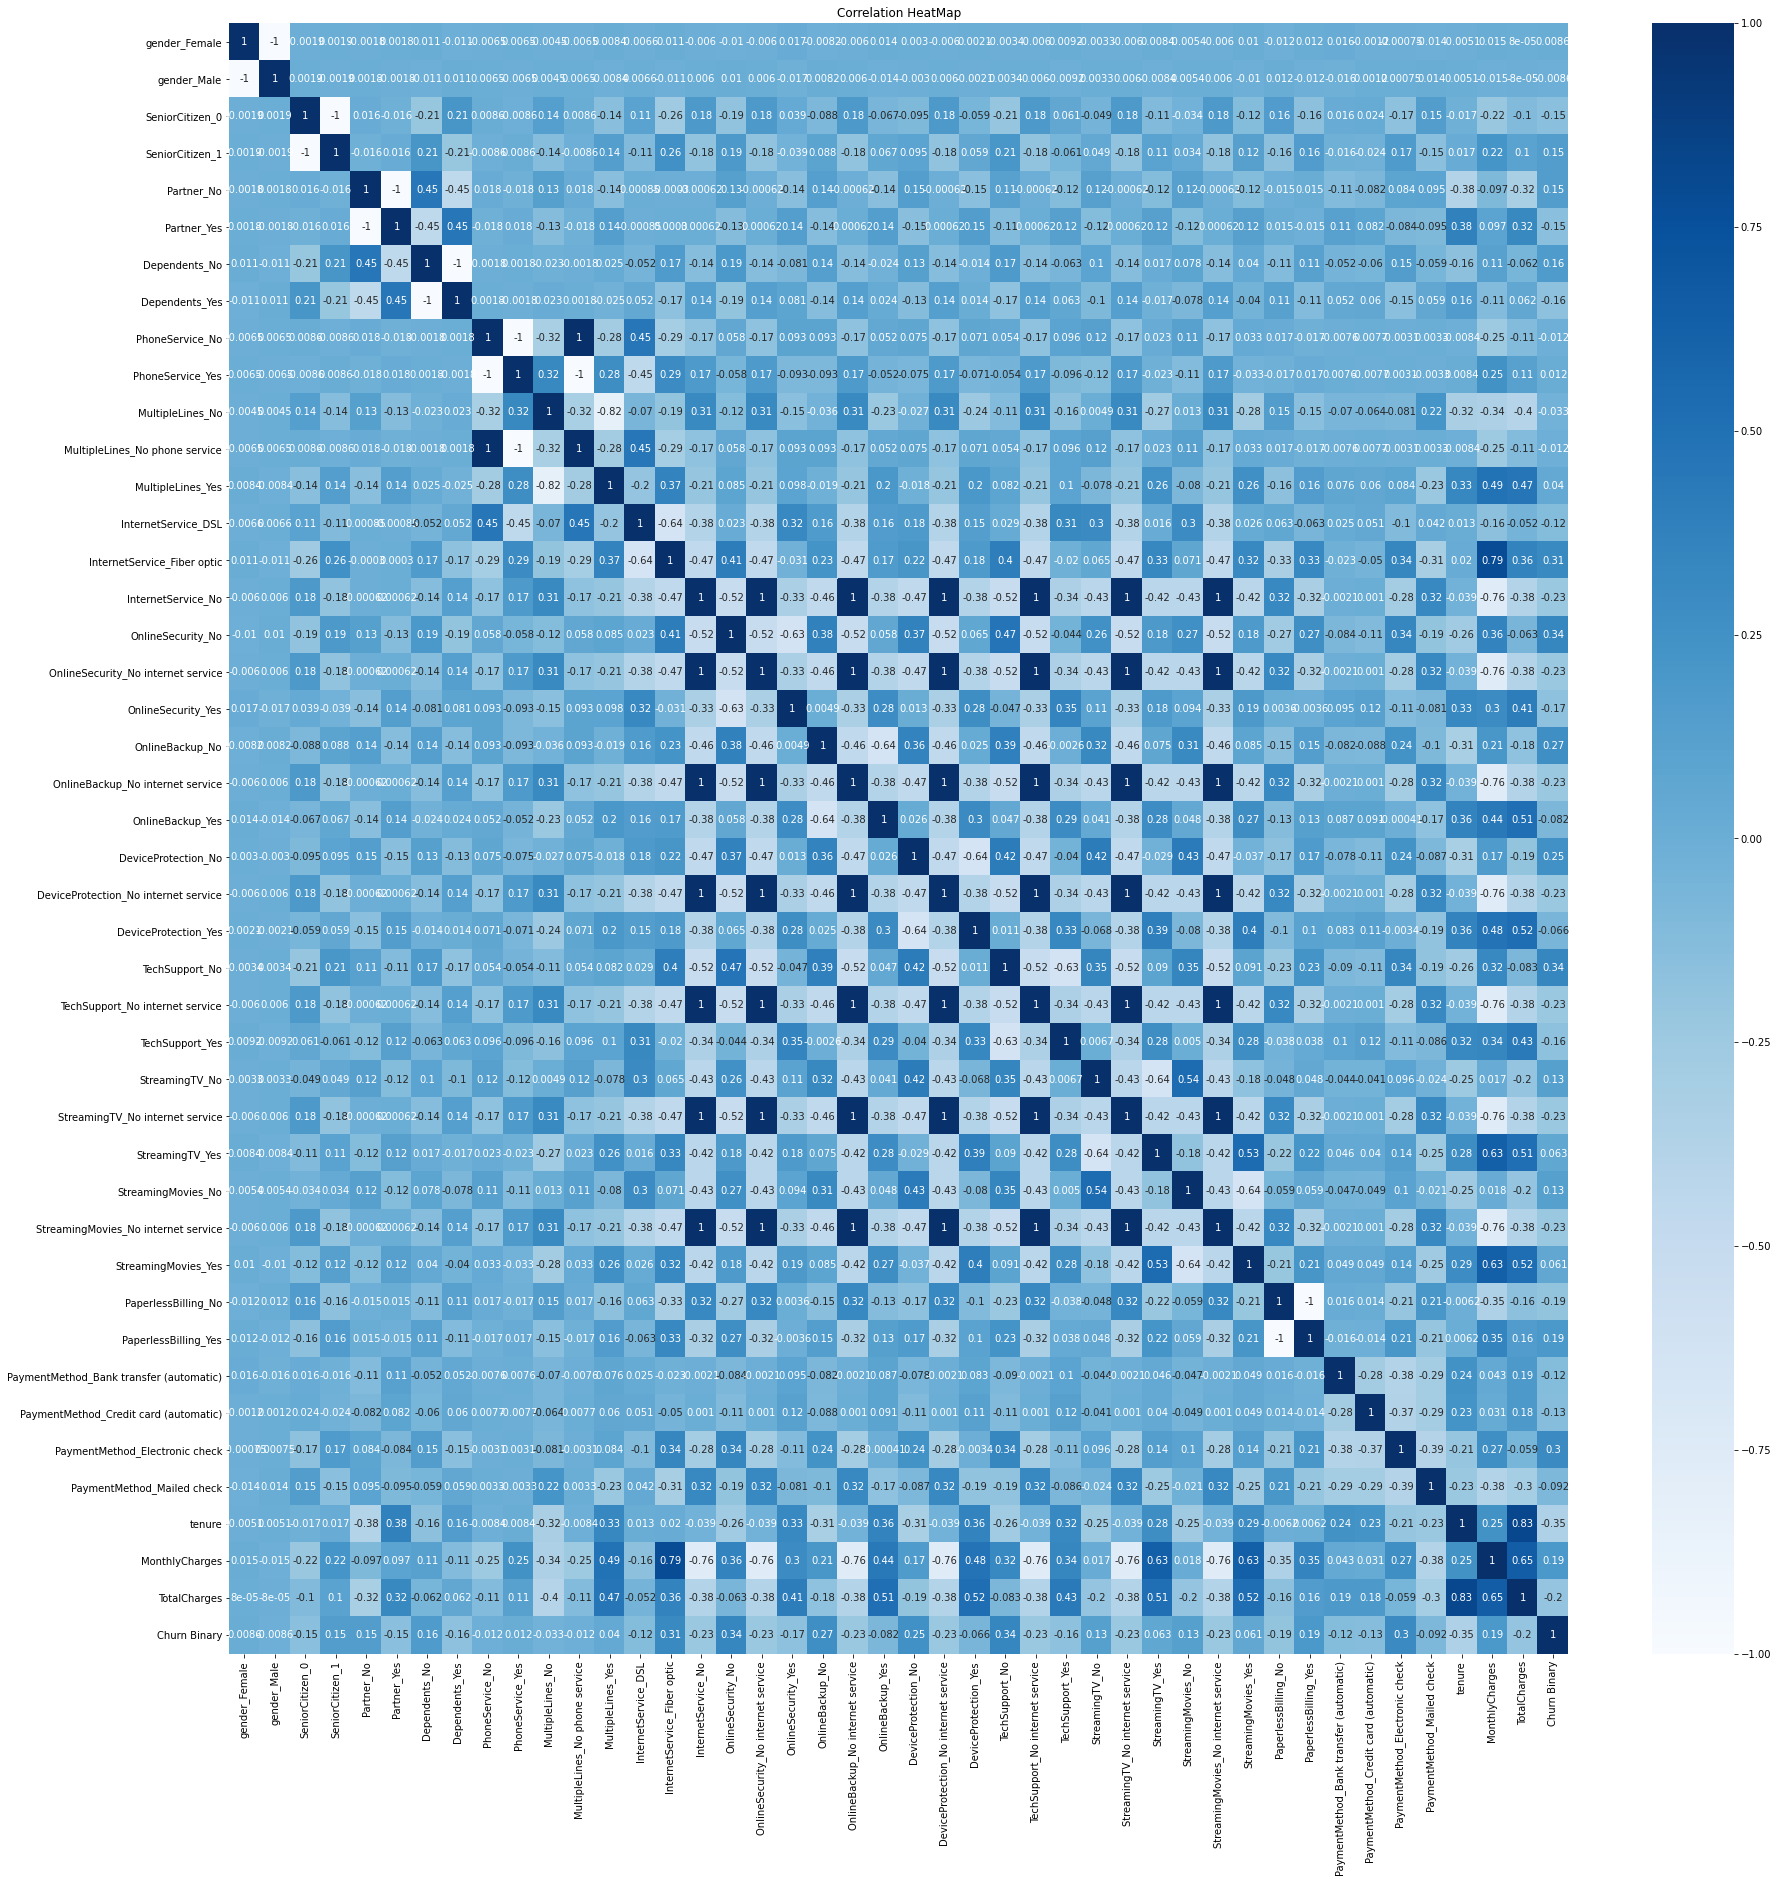

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_dummies.corr(), annot=True, cmap='Blues')
plt.title('Correlation HeatMap')

In [ ]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Binary
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No,0


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn Binary        0
dtype: int64

# Bonus

In [ ]:
#calculate how soon the company will lose all these customers
quantity = 7043
Churn_percent = 0.2654
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


## if there is no new customer,the company will lose all these customers nearly in 29 month

In [ ]:
#Sexe
##Female
quantity1 = 3488
Churn_percent1 = 0.2692
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
##Male
quantity = 3555
Churn_percent = 0.2641
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27



## In 27 month they will lost all demographics based on gender

In [ ]:
#Age
##Youngh
quantity1 = 5901
Churn_percent1 = 0.7453
day1 = 0

while quantity1 >=1:
    quantity1 = quantity1 -(quantity1 * (Churn_percent1))
    day1 +=1
    print(day1)   
    
#Old
quantity = 1142
Churn_percent = 0.2547
day = 0

while quantity >=1:
    quantity = quantity -(quantity * (Churn_percent))
    day +=1
    print(day)

1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


## lost all younght clients(7 months) before the old (24 months)